## Create a Portfolio

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import plotly.express as px
from scipy.optimize import minimize

In [33]:
t1 = 'MSFT'
t2 = 'AAPL'
t3 = 'GOOGL'
t4 = 'ACN'
t5 = 'IBM'
t6 = 'JPM'
t7 = 'BLK'
t8 = 'WMT'
t9 = 'AMZN'
t10 = 'NKE'

In [34]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2022-01-01')

In [35]:
MSFT = pdr.DataReader(t1,'yahoo',start,end)
AAPL = pdr.DataReader(t2,'yahoo',start,end)
GOOGL = pdr.DataReader(t3,'yahoo',start,end)
ACN = pdr.DataReader(t4,'yahoo',start,end)
IBM = pdr.DataReader(t5,'yahoo',start,end)
JPM = pdr.DataReader(t6,'yahoo',start,end)
BLK = pdr.DataReader(t7,'yahoo',start,end)
WMT = pdr.DataReader(t8,'yahoo',start,end)
AMZN = pdr.DataReader(t9,'yahoo',start,end)
NKE = pdr.DataReader(t1,'yahoo',start,end)

## Create a crypto's Portfolio

In [207]:
start2 = pd.to_datetime('2021-01-01')
end2 = pd.to_datetime('2022-11-09')

In [208]:
BTC = pdr.DataReader('BTC-USD','yahoo',start2,end2)
ETH = pdr.DataReader('ETH-USD','yahoo',start2,end2)
BNB = pdr.DataReader('BNB-USD','yahoo',start2,end2)
XRP = pdr.DataReader('XRP-USD','yahoo',start2,end2)
AVAX = pdr.DataReader('AVAX-USD','yahoo',start2,end2)
SOL = pdr.DataReader('SOL-USD','yahoo',start2,end2)
ADA = pdr.DataReader('ADA-USD','yahoo',start2,end2)
MATIC = pdr.DataReader('MATIC-USD','yahoo',start2,end2)
LINK = pdr.DataReader('LINK-USD','yahoo',start2,end2)
DOT = pdr.DataReader('DOT-USD','yahoo',start2,end2)

In [209]:
stocks = pd.concat([BTC['Close'],ETH['Close'],BNB['Close'],XRP['Close'],AVAX['Close'],
                    SOL['Close'], ADA['Close'], MATIC['Close'],LINK['Close'],DOT['Close']],axis=1)
stocks.columns = ['BTC','ETH','BNB','XRP','AVAX','SOL', 'ADA', 'MATIC','TRX','DOT']

In [36]:
assets = pd.concat([MSFT['Close'],AAPL['Close'],GOOGL['Close'],ACN['Close'],IBM['Close'],
                    JPM['Close'],BLK['Close'],WMT['Close'],AMZN['Close'],NKE['Close']],axis=1)
assets.columns = [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10]

In [37]:
assets

,MSFT,AAPL,GOOGL,ACN,IBM,JPM,BLK,WMT,AMZN,NKE
Date,,,,,,,,,,
2010-01-04,30.950001,7.643214,15.684434,42.070000,126.625237,42.849998,238.580002,54.230000,6.695000,30.950001
2010-01-05,30.959999,7.656429,15.615365,42.330002,125.095604,43.680000,239.610001,53.689999,6.734500,30.959999
2010-01-06,30.770000,7.534643,15.221722,42.779999,124.282982,43.919998,234.669998,53.570000,6.612500,30.770000
2010-01-07,30.450001,7.520714,14.867367,42.740002,123.852776,44.790001,237.250000,53.599998,6.500000,30.450001
2010-01-08,30.660000,7.570714,15.065566,42.570000,125.095604,44.680000,238.919998,53.330002,6.676000,30.660000
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,342.450012,180.330002,147.906494,415.329987,131.619995,158.160004,922.570007,140.759995,169.669495,342.450012
2021-12-28,341.250000,179.289993,146.686996,415.269989,132.630005,158.639999,921.820007,142.779999,170.660995,341.250000
2021-12-29,341.950012,179.380005,146.654999,415.420013,133.350006,158.559998,909.719971,142.710007,169.201004,341.950012


## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [210]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

BTC      0.000066
ETH      0.002227
BNB      0.005020
XRP      0.002882
AVAX     0.005417
SOL      0.006505
ADA      0.002915
MATIC    0.009634
TRX      0.001476
DOT      0.001775
dtype: float64

In [211]:
stocks.pct_change(1).corr()

,BTC,ETH,BNB,XRP,AVAX,SOL,ADA,MATIC,TRX,DOT
BTC,1.000000,0.807131,0.637316,0.584455,0.546947,0.520939,0.639864,0.567458,0.702517,0.706723
ETH,0.807131,1.000000,0.637355,0.579373,0.574114,0.605594,0.667958,0.631142,0.781013,0.749315
BNB,0.637316,0.637355,1.000000,0.521457,0.538680,0.544971,0.552665,0.598907,0.613126,0.602004
XRP,0.584455,0.579373,0.521457,1.000000,0.489522,0.447115,0.533523,0.482491,0.593779,0.557867
AVAX,0.546947,0.574114,0.538680,0.489522,1.000000,0.531713,0.649522,0.541610,0.552492,0.596666
SOL,0.520939,0.605594,0.544971,0.447115,0.531713,1.000000,0.499167,0.485946,0.534379,0.531757
ADA,0.639864,0.667958,0.552665,0.533523,0.649522,0.499167,1.000000,0.598055,0.682598,0.674209
MATIC,0.567458,0.631142,0.598907,0.482491,0.541610,0.485946,0.598055,1.000000,0.622947,0.579711
TRX,0.702517,0.781013,0.613126,0.593779,0.552492,0.534379,0.682598,0.622947,1.000000,0.747395
DOT,0.706723,0.749315,0.602004,0.557867,0.596666,0.531757,0.674209,0.579711,0.747395,1.000000


In [212]:
stock_normed = stocks/stocks.iloc[0]
stock_normed

,BTC,ETH,BNB,XRP,AVAX,SOL,ADA,MATIC,TRX,DOT
Date,,,,,,,,,,
2021-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-02,1.093726,1.060473,1.008880,0.933504,0.953645,0.976761,1.011822,1.069111,1.029276,1.108588
2021-01-03,1.116016,1.335639,1.085582,0.951163,0.947643,1.173536,1.169062,1.121435,1.149725,1.207837
2021-01-04,1.088437,1.424260,1.079708,0.996770,0.979650,1.349068,1.281791,1.381877,1.143062,1.139980
2021-01-05,1.157222,1.506099,1.101031,0.954962,1.156239,1.171074,1.473134,1.373625,1.224662,1.167915
...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.719926,2.252418,9.349856,2.124307,5.292414,18.338389,2.403907,65.671794,0.736282,0.850445
2022-11-05,0.724538,2.228971,9.213920,2.077669,5.349030,19.958787,2.433619,66.456433,0.729875,0.845023
2022-11-06,0.712412,2.152662,8.953681,1.982236,4.987752,17.742720,2.298289,63.887711,0.684019,0.821116


In [213]:
fig = px.line(stock_normed)
fig.show()

In [214]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret

,BTC,ETH,BNB,XRP,AVAX,SOL,ADA,MATIC,TRX,DOT
Date,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.093726,0.060473,0.008880,-0.066496,-0.046355,-0.023239,0.011822,0.069111,0.029276,0.108588
2021-01-03,0.020380,0.259475,0.076027,0.018917,-0.006294,0.201457,0.155403,0.048942,0.117023,0.089528
2021-01-04,-0.024712,0.066350,-0.005410,0.047948,0.033775,0.149575,0.096427,0.232240,-0.005795,-0.056180
2021-01-05,0.063197,0.057461,0.019749,-0.041943,0.180258,-0.131938,0.149278,-0.005972,0.071388,0.024504
...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.046375,0.074142,0.074881,0.108251,0.074697,0.095221,0.082443,0.228567,0.133171,0.099481
2022-11-05,0.006406,-0.010410,-0.014539,-0.021955,0.010698,0.088361,0.012360,0.011948,-0.008702,-0.006376
2022-11-06,-0.016737,-0.034235,-0.028244,-0.045933,-0.067541,-0.111032,-0.055608,-0.038653,-0.062828,-0.028291


In [215]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret

,BTC,ETH,BNB,XRP,AVAX,SOL,ADA,MATIC,TRX,DOT
Date,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,0.089590,0.058715,0.008840,-0.068810,-0.047464,-0.023514,0.011753,0.066827,0.028856,0.103087
2021-01-03,0.020175,0.230695,0.073275,0.018740,-0.006314,0.183535,0.144449,0.047782,0.110667,0.085744
2021-01-04,-0.025022,0.064242,-0.005425,0.046834,0.033217,0.139393,0.092056,0.208834,-0.005812,-0.057820
2021-01-05,0.061280,0.055871,0.019556,-0.042848,0.165733,-0.141493,0.139134,-0.005990,0.068955,0.024209
...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.045332,0.071522,0.072210,0.102783,0.072039,0.090956,0.079221,0.205849,0.125020,0.094839
2022-11-05,0.006385,-0.010465,-0.014646,-0.022199,0.010641,0.084673,0.012284,0.011877,-0.008740,-0.006396
2022-11-06,-0.016878,-0.034835,-0.028651,-0.047021,-0.069930,-0.117694,-0.057214,-0.039420,-0.064888,-0.028699


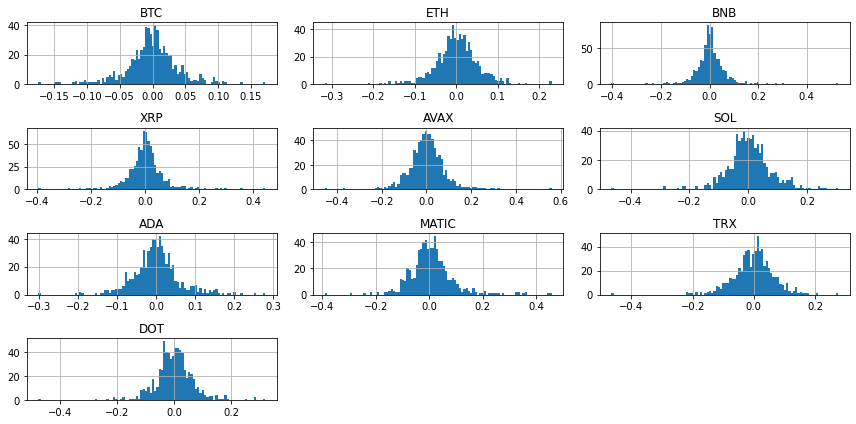

In [216]:
%matplotlib inline

log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [217]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('assets')
print(stocks.columns)
print('\n')

assets
Index(['BTC', 'ETH', 'BNB', 'XRP', 'AVAX', 'SOL', 'ADA', 'MATIC', 'TRX',
       'DOT'],
      dtype='object')




In [218]:
# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(10))
print(weights)
print('Sum of our Weights is')
print(weights.sum())
print('\n')

Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386 0.18993895]
Sum of our Weights is
4.918298056935911




In [219]:
# We're going to rebalance weights in order to have their sum equal to 1.0 
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('Sum of our Weights is')
print(weights.sum())
print('\n')

Rebalance to sum to 1.0
[0.10499539 0.11602948 0.00578945 0.03487419 0.13933214 0.16954988
 0.0624131  0.18169153 0.14670601 0.03861884]
Sum of our Weights is
1.0000000000000002




In [220]:
# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

Expected Portfolio Return
0.5262090498986347




In [221]:
# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

Expected Volatility
0.8727496191967518




In [61]:
# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Sharpe Ratio
0.8738757266697238


In [222]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(assets.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

In [223]:
sharpe_arr

array([0., 0., 0., ..., 0., 0., 0.])

In [224]:
for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(10))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [226]:
sharpe_arr.shape

(15000,)

In [227]:
sharpe_arr.max()

0.9398937738167222

In [228]:
sharpe_arr.argmax()

13308

In [229]:
sharpe_arr[sharpe_arr.argmax()]

0.9398937738167222

In [230]:
all_weights[sharpe_arr.argmax(),:]

array([0.04575094, 0.0463858 , 0.2521007 , 0.01185795, 0.16895506,
       0.09634034, 0.00253095, 0.32567134, 0.01520561, 0.03520132])

In [231]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

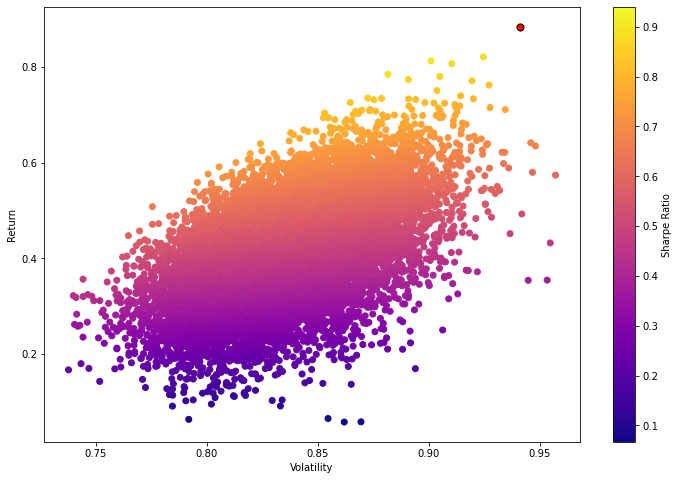

In [232]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [233]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [234]:
#help(minimize)

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [235]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [236]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [237]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [238]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [239]:
# Initial Guess (equal distribution)
init_guess = [0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]

In [240]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [241]:
opt_results

     fun: -1.184921221892892
     jac: array([ 5.75109616e-01,  4.33010831e-01,  3.82363796e-05,  4.42475989e-01,
        3.72908160e-01,  1.28000975e-05,  4.26510677e-01, -9.07480717e-06,
        9.07582879e-01,  8.40685427e-01])
 message: 'Optimization terminated successfully'
    nfev: 66
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.16987288e-16, 0.00000000e+00, 9.41356064e-02, 0.00000000e+00,
       1.04218392e-16, 2.10758595e-01, 0.00000000e+00, 6.95105799e-01,
       0.00000000e+00, 1.43805393e-16])

In [242]:
opt_results.x

array([3.16987288e-16, 0.00000000e+00, 9.41356064e-02, 0.00000000e+00,
       1.04218392e-16, 2.10758595e-01, 0.00000000e+00, 6.95105799e-01,
       0.00000000e+00, 1.43805393e-16])

In [243]:
get_ret_vol_sr(opt_results.x)

array([1.33646085, 1.12789004, 1.18492122])

# Deep model for Portfolio selection

In [244]:
# setting the seed allows for reproducible results
np.random.seed(101)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K

In [252]:
stocks

,BTC,ETH,BNB,XRP,AVAX,SOL,ADA,MATIC,TRX,DOT
Date,,,,,,,,,,
2021-01-01,29374.152344,730.367554,37.905010,0.237444,3.664823,1.842084,0.175350,0.017812,11.872555,8.306819
2021-01-02,32127.267578,774.534973,38.241592,0.221655,3.494940,1.799275,0.177423,0.019043,12.220137,9.208837
2021-01-03,32782.023438,975.507690,41.148979,0.225848,3.472944,2.161752,0.204995,0.019975,13.650172,10.033283
2021-01-04,31971.914062,1040.233032,40.926353,0.236677,3.590243,2.485097,0.224762,0.024614,13.571063,9.469611
2021-01-05,33992.429688,1100.006104,41.734600,0.226750,4.237412,2.157217,0.258314,0.024467,14.539868,9.701656
...,...,...,...,...,...,...,...,...,...,...
2022-11-04,21147.230469,1645.093384,354.406372,0.504404,19.395760,33.780853,0.421525,1.169746,8.741551,7.064493
2022-11-05,21282.691406,1627.968018,349.253723,0.493330,19.603249,36.765762,0.426735,1.183722,8.665482,7.019451
2022-11-06,20926.486328,1572.234741,339.389374,0.470670,18.279230,32.683582,0.403005,1.137968,8.121049,6.820865


#### Test

In [245]:
#x = tf.constant([[1, 2, 3], [5, 5, 5], [1, 1, 1]])
#x.numpy()
#display(tf.reduce_sum(x, axis=0))
#display(tf.reduce_sum(x, axis=1))
#display(tf.reduce_sum(assets, axis=1))

In [246]:
#help(tf.reduce_sum)

In [247]:
#x = tf.constant(([1, 2, 3, 4]))
#tf.multiply(x, x).numpy()

In [270]:
class Model:
    def __init__(self):
        self.data = None
        self.model = None
        
    def __build_model(self, input_shape, outputs):
        '''
        Builds and returns the Deep Neural Network that will compute the allocation ratios
        that optimize the Sharpe Ratio of the portfolio
        
        inputs: input_shape - tuple of the input shape, outputs - the number of assets
        returns: a Deep Neural Network model
        '''
        
        model = Sequential()
        model.add(LSTM(100, input_shape=input_shape,return_sequences=True))
        model.add(LSTM(100, return_sequences=True))
        model.add(LSTM(100, return_sequences=False))
        model.add(Flatten()) 
        model.add(Dense(outputs, activation='softmax')) 
        

        def sharpe_loss(_, y_pred):
            # make all time-series start at 1
            data = tf.divide(self.data, self.data[0])  
            
            # value of the portfolio after allocations applied
            portfolio_values = tf.reduce_sum(tf.multiply(data, y_pred), axis=1) 
            
            portfolio_returns = (portfolio_values[1:] - portfolio_values[:-1]) / portfolio_values[:-1]  
            # % change formula

            sharpe = K.mean(portfolio_returns) / K.std(portfolio_returns)
            
            # since we want to maximize Sharpe, while gradient descent minimizes the loss, 
            #   we can negate Sharpe (the min of a negated function is its max)
            return -sharpe
        
        model.compile(loss=sharpe_loss, optimizer='adam')
        return model
    
    
    def get_allocations(self, data: pd.DataFrame):
        '''
        Computes and returns the allocation ratios that optimize the Sharpe over the given data
        
        input: data - DataFrame of historical closing prices of various assets
        
        return: the allocations ratios for each of the given assets
        '''
        
        # data with returns
        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)
        
        data = data.iloc[1:]
        self.data = tf.cast(tf.constant(data), float)
        
        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns))
        
        fit_predict_data = data_w_ret[np.newaxis,:]        
        self.model.fit(fit_predict_data, np.zeros((1, len(data.columns))), epochs=100, shuffle=False)
        return self.model.predict(fit_predict_data)[0]

In [271]:
model = Model()

In [272]:
coef=model.get_allocations(stocks)

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: -0.0833
Epoch 2/100
1/1 [==============================] - 1s 930ms/step - loss: -0.0895
Epoch 3/100
1/1 [==============================] - 1s 761ms/step - loss: -0.0959
Epoch 4/100
1/1 [==============================] - 1s 978ms/step - loss: -0.1003
Epoch 5/100
1/1 [==============================] - 1s 928ms/step - loss: -0.1035
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: -0.1057
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: -0.1068
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: -0.1074
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: -0.1077
Epoch 10/100
1/1 [==============================] - 1s 1s/step - loss: -0.1079
Epoch 11/100
1/1 [==============================] - 1s 1s/step - loss: -0.1080
Epoch 12/100
1/1 [==============================] - 1s 933ms/step - loss: -0.1080
Epoch 13/100
1/1 [==========================

### Allocations

In [273]:
#deep Learning 
display(coef,
        '------Sum of allo------ :',coef.sum(),
        '------return , volatility , Shape ratio------ :',get_ret_vol_sr(coef))

array([1.4595162e-04, 7.0431677e-05, 5.2308320e-04, 2.1922766e-04,
       2.8019369e-04, 2.9904148e-01, 1.5697465e-04, 6.9931185e-01,
       8.1961349e-05, 1.6886757e-04], dtype=float32)

'------Sum of allo------ :'

1.0

'------return , volatility , Shape ratio------ :'

array([1.35187983, 1.14484474, 1.18084119])

In [274]:
# Monte carlo Simulation 
display(all_weights[sharpe_arr.argmax(),:],
        '------Sum of allo------ :',coef.sum(),
        '------return , volatility , Shape ratio------ :',get_ret_vol_sr(all_weights[sharpe_arr.argmax(),:]))

array([0.04575094, 0.0463858 , 0.2521007 , 0.01185795, 0.16895506,
       0.09634034, 0.00253095, 0.32567134, 0.01520561, 0.03520132])

'------Sum of allo------ :'

1.0

'------return , volatility , Shape ratio------ :'

array([0.88460217, 0.9411725 , 0.93989377])

In [275]:
display(coef,
        '------Sum of allo------ :',opt_results.x.sum(),
        '------return , volatility , Shape ratio------ :',get_ret_vol_sr(opt_results.x))

array([1.4595162e-04, 7.0431677e-05, 5.2308320e-04, 2.1922766e-04,
       2.8019369e-04, 2.9904148e-01, 1.5697465e-04, 6.9931185e-01,
       8.1961349e-05, 1.6886757e-04], dtype=float32)

'------Sum of allo------ :'

1.0000000000000007

'------return , volatility , Shape ratio------ :'

array([1.33646085, 1.12789004, 1.18492122])

In [276]:
# allocation 
allo=[1.4595162e-04, 7.0431677e-05, 5.2308320e-04, 2.1922766e-04,
       2.8019369e-04, 2.9904148e-01, 1.5697465e-04, 6.9931185e-01,
       8.1961349e-05, 1.6886757e-04]

In [277]:
for assets in(BTC ,ETH ,BNB ,XRP ,AVAX,SOL ,ADA ,MATIC,LINK,DOT ):
    assets['Normed Return'] = assets['Close']/assets.iloc[0]['Close']

In [283]:
for assets,allo in zip([BTC ,ETH ,BNB ,XRP ,AVAX,SOL ,ADA ,MATIC,LINK,DOT],
                       [1.4595162e-04, 7.0431677e-05, 5.2308320e-04, 2.1922766e-04,2.8019369e-04, 
                        2.9904148e-01, 1.5697465e-04, 6.9931185e-01,8.1961349e-05, 1.6886757e-04]):
    assets['Allocation'] = assets['Normed Return']*allo

In [282]:
assets

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2021-01-01,9.416587,8.120194,9.288180,8.306819,2.791211e+09,8.306819,1.000000,0.000169
2021-01-02,9.761335,7.943290,8.305492,9.208837,3.049232e+09,9.208837,1.108588,0.000187
2021-01-03,10.457493,8.873362,9.209648,10.033283,3.032883e+09,10.033283,1.207837,0.000204
2021-01-04,10.505565,8.777210,10.062048,9.469611,2.893263e+09,9.469611,1.139980,0.000193
2021-01-05,10.041344,9.084263,9.475802,9.701656,2.080742e+09,9.701656,1.167915,0.000197
...,...,...,...,...,...,...,...,...
2022-11-04,7.087750,6.397514,6.424051,7.064493,5.539557e+08,7.064493,0.850445,0.000144
2022-11-05,7.230443,6.969273,7.063235,7.019451,4.262436e+08,7.019451,0.845023,0.000143
2022-11-06,7.137769,6.813940,7.021435,6.820865,3.127942e+08,6.820865,0.821116,0.000139


In [290]:
for assets in [BTC ,ETH ,BNB ,XRP ,AVAX,SOL ,ADA ,MATIC,LINK,DOT]:
    assets['Position Values'] = assets['Allocation']*100000

In [291]:
portfolio_val = pd.concat([
BTC['Position Values'] ,ETH['Position Values'] ,BNB['Position Values'] ,
    XRP['Position Values'] ,AVAX['Position Values'],SOL['Position Values'] ,
    ADA['Position Values'] ,MATIC['Position Values'],LINK['Position Values'],DOT['Position Values']
],axis=1)

In [292]:
portfolio_val.columns = ['BTC Pos' ,'ETH Pos' ,'BNB Pos' ,'XRP Pos' ,'AVAX Pos',
                         'SOL Pos' ,'ADA Pos' ,'MATIC Pos','LINK Pos','DOT Pos']

In [293]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [295]:
fig = px.line(portfolio_val['Total Pos'])
fig.show()

In [296]:
fig = px.line(portfolio_val.drop('Total Pos',axis=1))
fig.show()